In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [3]:
# read dataset
df = pd.read_csv('cleaned_data_removed_outliers.csv')
# get correlations
df_corr = df.corr()
# irrelevant fields
#fields = ['rating', 'shelf', 'cups', 'weight']
# drop rows
#df_corr.drop(fields, inplace=True)
# drop cols
#df_corr.drop(fields, axis=1, inplace=True)
df_corr

TotalScore  education     urban    gender    engnat       age  \
TotalScore     1.000000  -0.085059  0.033792  0.096458 -0.025017  0.010991   
education     -0.085059   1.000000  0.026936 -0.167004  0.089833  0.478657   
urban          0.033792   0.026936  1.000000  0.006694  0.146600 -0.015849   
gender         0.096458  -0.167004  0.006694  1.000000 -0.046861 -0.169738   
engnat        -0.025017   0.089833  0.146600 -0.046861  1.000000 -0.090805   
age            0.010991   0.478657 -0.015849 -0.169738 -0.090805  1.000000   
hand           0.039323  -0.003246  0.008520  0.067592  0.004779 -0.011943   
religion       0.224492   0.026634  0.028738  0.073434 -0.030414  0.111408   
orientation    0.051074  -0.166128 -0.003836  0.340814 -0.065606 -0.216005   
race          -0.023849  -0.012296 -0.074132 -0.009485 -0.131500  0.068822   
voted          0.062666  -0.272995  0.030093  0.087440 -0.035744 -0.243605   
married        0.029985   0.284387 -0.019412 -0.056196 -0.106057  0.618559   
familysize     0.054090   0.029060 -0.077700 -0.004226 -0.113375  0.154256   

                 hand  religion  orientation      race     voted   married  \
TotalScore   0.039323  0.224492     0.051074 -0.023849  0.062666  0.029985   
education   -0.003246  0.026634    -0.166128 -0.012296 -0.272995  0.284387   
urban        0.008520  0.028738    -0.003836 -0.074132  0.030093 -0.019412   
gender       0.067592  0.073434     0.340814 -0.009485  0.087440 -0.056196   
engnat       0.004779 -0.030414    -0.065606 -0.131500 -0.035744 -0.106057   
age         -0.011943  0.111408    -0.216005  0.068822 -0.243605  0.618559   
hand         1.000000  0.044470     0.068715 -0.003365  0.020926  0.002410   
religion     0.044470  1.000000     0.005213 -0.051482  0.018030  0.092216   
orientation  0.068715  0.005213     1.000000  0.061040  0.099541 -0.157008   
race        -0.003365 -0.051482     0.061040  1.000000 -0.022191  0.064481   
voted        0.020926  0.018030     0.099541 -0.022191  1.000000 -0.130865   
married      0.002410  0.092216    -0.157008  0.064481 -0.130865  1.000000   
familysize   0.033289  0.042268    -0.051538 -0.005522 -0.041780  0.138484   

             familysize  
TotalScore     0.054090  
education      0.029060  
urban         -0.077700  
gender        -0.004226  
engnat        -0.113375  
age            0.154256  
hand           0.033289  
religion       0.042268  
orientation   -0.051538  
race          -0.005522  
voted         -0.041780  
married        0.138484  
familysize     1.000000

In [4]:
np.ones_like(df_corr, dtype=np.bool)

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,

In [5]:
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

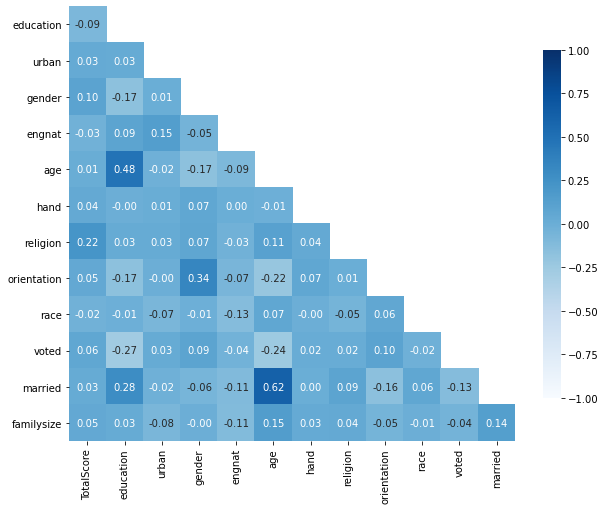

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# plot heatmap
sb.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

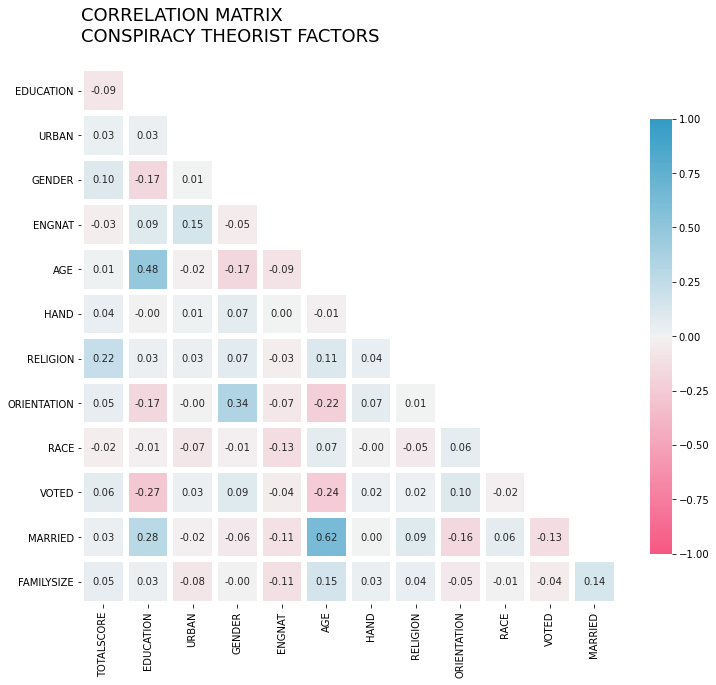

In [9]:
fig, ax = plt.subplots(figsize=(12, 10))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# color map
cmap = sb.diverging_palette(0, 230, 90, 60, as_cmap=True)
# plot heatmap
sb.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)
# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
# title
title = 'CORRELATION MATRIX\nCONSPIRACY THEORIST FACTORS\n'
plt.title(title, loc='left', fontsize=18)
plt.show()